In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tabulate

In [2]:
df = pd.read_csv("Customer Churn.csv")

In [3]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [4]:
df["Churn"].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

In [5]:
df.shape

(3150, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [7]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [8]:
#sns.pairplot(df)

In [9]:
# Checking the data is balanced or not
df["Churn"].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

In [10]:
# The data is imbalanced 

In [11]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [12]:
df.columns = df.columns.str.replace(" ","_")

In [13]:
df.columns

Index(['Call__Failure', 'Complains', 'Subscription__Length', 'Charge__Amount',
       'Seconds_of_Use', 'Frequency_of_use', 'Frequency_of_SMS',
       'Distinct_Called_Numbers', 'Age_Group', 'Tariff_Plan', 'Status', 'Age',
       'Customer_Value', 'Churn'],
      dtype='object')

In [14]:
df.columns = df.columns.str.replace("__","_")

In [15]:
df["Tariff_Plan"].value_counts()

1    2905
2     245
Name: Tariff_Plan, dtype: int64

In [16]:
df["Age_Group"].unique()

array([3, 2, 1, 4, 5], dtype=int64)

In [17]:
df.columns

Index(['Call_Failure', 'Complains', 'Subscription_Length', 'Charge_Amount',
       'Seconds_of_Use', 'Frequency_of_use', 'Frequency_of_SMS',
       'Distinct_Called_Numbers', 'Age_Group', 'Tariff_Plan', 'Status', 'Age',
       'Customer_Value', 'Churn'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

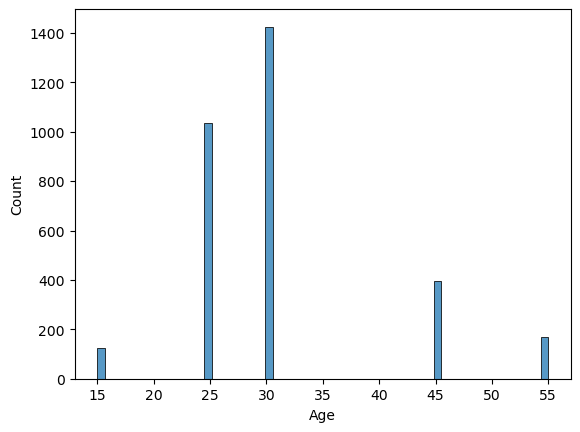

In [18]:
sns.histplot(df["Age"])

In [19]:
# Can remove the Age or Age Group.
# Removing Age
df.drop(columns = ["Age"] ,inplace =True)

In [21]:
df["Charge_Amount"].unique()

array([ 0,  1,  2,  3,  8,  4,  9,  7,  5, 10,  6], dtype=int64)

In [22]:
df.columns

Index(['Call_Failure', 'Complains', 'Subscription_Length', 'Charge_Amount',
       'Seconds_of_Use', 'Frequency_of_use', 'Frequency_of_SMS',
       'Distinct_Called_Numbers', 'Age_Group', 'Tariff_Plan', 'Status',
       'Customer_Value', 'Churn'],
      dtype='object')

In [23]:
df.rename(columns = {"Frequency_of_use" : "Frequency_of_calls" , 
                    "Seconds_of_Use" : "Seconds_of_call",
                    "Subscription_Length" : "Subscription_Length_months"} , inplace = True)

In [24]:
df.head()

,Call_Failure,Complains,Subscription_Length_months,Charge_Amount,Seconds_of_call,Frequency_of_calls,Frequency_of_SMS,Distinct_Called_Numbers,Age_Group,Tariff_Plan,Status,Customer_Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,145.805,0


# Check Correlation

In [25]:
df_corr = df.corr()

<Axes: >

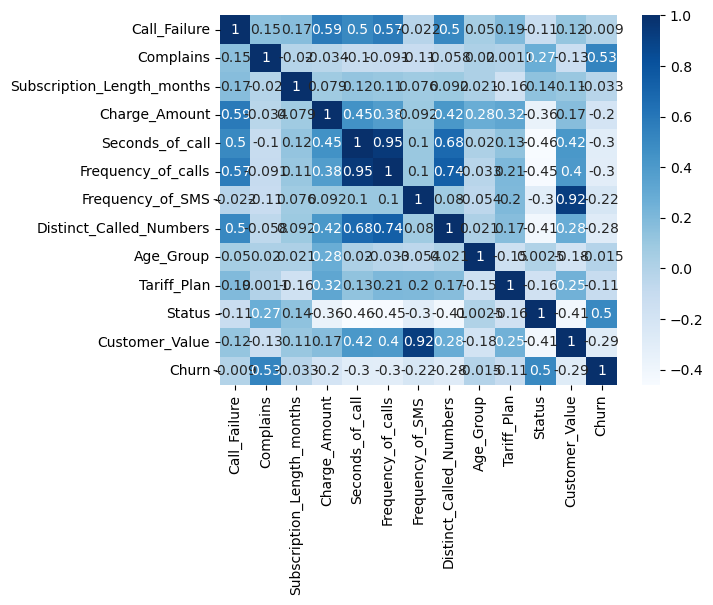

In [26]:
sns.heatmap(df_corr , annot =True ,cmap = "Blues")

<Axes: >

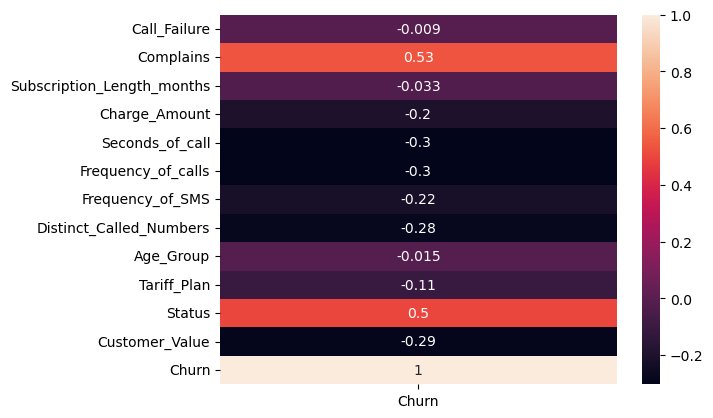

In [27]:
sns.heatmap(df_corr[["Churn"]], annot = True )

# Model Building

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
dtrc = DecisionTreeClassifier()
import xgboost
from xgboost import XGBClassifier
xgbc = XGBClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
from sklearn.ensemble import AdaBoostClassifier
adbc = AdaBoostClassifier()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [182]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report ,precision_score, recall_score , roc_curve , roc_auc_score

In [38]:
X = df.drop(columns =["Churn"])
y = df["Churn"]

In [47]:
xtrain , xtest, ytrain , ytest = train_test_split(X , y , random_state= 12 , test_size =0.2)
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((2520, 12), (630, 12), (2520,), (630,))

In [48]:
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [49]:
xtrain = pd.DataFrame(xtrain)
xtest = pd.DataFrame(xtest)
xtrain.columns = X.columns
xtest.columns = X.columns

# Function to get metrics for all models

In [120]:
def model_metrics(algos):
    
    res = pd.DataFrame()
    df_pred_all = pd.DataFrame()
    
    
    for algo in algos:
        
        #print(algo)
        
        algo.fit(xtrain , ytrain)
        
        y_pred_train = algo.predict(xtrain)

        y_pred = algo.predict(xtest)



        df_pred = pd.DataFrame({"actual" : ytest ,
                                "predicted" : y_pred,
                               "algo" : str(algo).split("(")[0]})

                
        df_pred_train = pd.DataFrame({"actual" : ytrain ,
                                "predicted_train" : y_pred_train})
        
        #df_pred_all = df_pred_all.append(df_pred)
        df_pred_all = pd.concat([df_pred_all, df_pred], ignore_index=True)
        
        accuracy = round(accuracy_score(df_pred["actual"] , df_pred["predicted"]),2)
        precision = round(precision_score(df_pred["actual"] , df_pred["predicted"]),2)
        recall = round(recall_score(df_pred["actual"] , df_pred["predicted"]),2)
#         cm = confusion_matrix(df_pred["actual"] , df_pred["predicted"])
        
#         sns.heatmap(cm , annot =True , cmap ="Greens")
#         plt.title("Confusion Matrix for {}".format(algo))
#         plt.show()
        
        accuracy_train = round(accuracy_score(df_pred_train["actual"] , df_pred_train["predicted_train"]),2)
        precision_train = round(precision_score(df_pred_train["actual"] , df_pred_train["predicted_train"]),2)
        recall_train = round(recall_score(df_pred_train["actual"] , df_pred_train["predicted_train"]),2)
       
        
        df_metric = pd.DataFrame({'model' : str(algo).split("(")[0],
                                  "accuracy" : [accuracy], 
                                  "precision" : [precision],
                                  "recall" : [recall],
                                  "accuracy_train" :[accuracy_train],
                                  "precision_train" :[precision_train],
                                 "recall_train" : [recall_train]
                                 })

        
        #res = res.append(df_metric)
        res = pd.concat([res, df_metric], ignore_index=True)
     
    print(res)
    #print(tabulate(res , headers='keys', tablefmt='psql'))
    
    print("The High accuracy model is :")
    model_good = pd.DataFrame(res.iloc[res["recall"].argmax()]).T.set_index('model')
    print(model_good.to_markdown())
    #print(tabulate(model_good , headers ='keys' , tablefmt = 'psql'))

    return df_pred_all
        

In [127]:
res = model_metrics([lrc , rfc , gbc , xgbc])
# I am considering good Recall for picking up the mode because the data is imbalance and 
# correctly identifying as many positive instances as possible is my priority
# Recall focuses on minimizing false negatives

                        model  accuracy  precision  recall  accuracy_train  \
0          LogisticRegression      0.89       0.81    0.46            0.90   
1      RandomForestClassifier      0.95       0.88    0.79            0.99   
2  GradientBoostingClassifier      0.93       0.82    0.71            0.97   
3               XGBClassifier      0.95       0.86    0.81            0.99   

   precision_train  recall_train  
0             0.79          0.44  
1             0.97          0.99  
2             0.93          0.86  
3             0.97          0.98  
The High accuracy model is :
| model         |   accuracy |   precision |   recall |   accuracy_train |   precision_train |   recall_train |
|:--------------|-----------:|------------:|---------:|-----------------:|------------------:|---------------:|
| XGBClassifier |       0.95 |        0.86 |     0.81 |             0.99 |              0.97 |           0.98 |


In [128]:
res_xgbc = res[res["algo"].str.contains("XGB")]
cm = confusion_matrix(res_xgbc[ "actual"] , res_xgbc["predicted"]) 

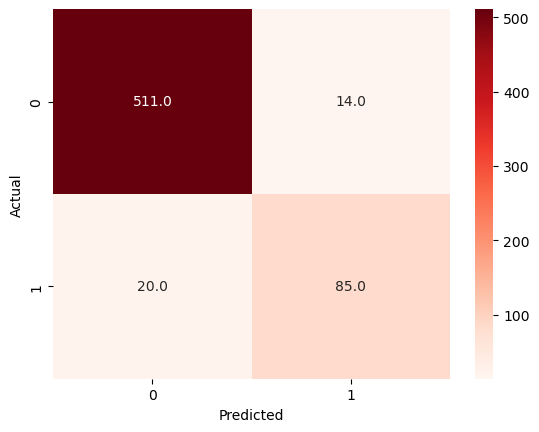

In [129]:
sns.heatmap(cm ,annot = True , cmap = "Reds" , fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [130]:
ytest.value_counts()

0    525
1    105
Name: Churn, dtype: int64

In [132]:
print(classification_report(res_xgbc[ "actual"] , res_xgbc["predicted"]))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       525
           1       0.86      0.81      0.83       105

    accuracy                           0.95       630
   macro avg       0.91      0.89      0.90       630
weighted avg       0.95      0.95      0.95       630



In [153]:
# ROC
pred_prob1 = xgbc.predict_proba(xtest)
pred_prob2 = rfc.predict_proba(xtest)
# roc curve for model
fpr1, tpr1, thresh1 = roc_curve(ytest,pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(ytest,pred_prob2[:,1], pos_label=1)

In [179]:
# auc scores
auc_score1 = round(roc_auc_score(ytest, pred_prob1[:,1]),3)
auc_score2 = round(roc_auc_score(ytest, pred_prob2[:,1]),3)


print(auc_score1 , auc_score2)

0.985 0.978


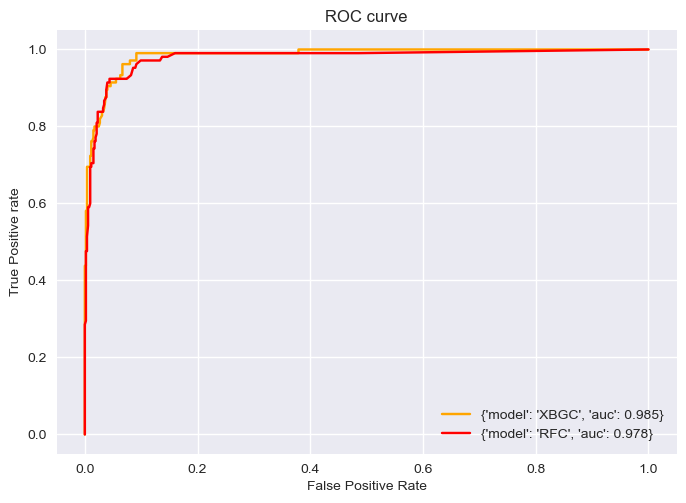

In [180]:

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='orange', label={'model' : 'XBGC','auc':auc_score1})
plt.plot(fpr2, tpr2, linestyle='-',color='red', label={'model' : 'RFC','auc':auc_score2})

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();